# 1.0 Classification Problem using decision tree classifier

##1.1 Dataset description

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

We build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not.

**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure**: Diastolic blood pressure (mm Hg)

**SkinThickness**: Triceps skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction**: Diabetes pedigree function

**Age**: Age (years)

**Outcome**: Class variable (0 or 1) 268 of 768 are 1, the others are 0

<center>
  <figure>
    <img width="500" src="https://cdn.britannica.com/42/93542-050-E2B32DAB/women-Pima-shinny-game-field-hockey.jpg">
  </figure>
  <figcaption>Fig.1 - Prima indian</figcaption>
</center>


###1.1.1 Glucose Tolerance Test

It is a blood test that involves taking multiple blood samples over time, usually 2 hours.It used to diagnose diabetes. The results can be classified as normal, impaired, or abnormal.

**Normal Results for Diabetes**: Two-hour glucose level less than 140 mg/dL

**Impaired Results for Diabetes** Two-hour glucose level 140 to 200 mg/dL

**Abnormal (Diagnostic) Results for Diabetes** Two-hour glucose level greater than 200 mg/dL


###1.1.2 Blood Pressure

The diastolic reading, or the bottom number, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen. A normal diastolic blood pressure is lower than 80. A reading of 90 or higher means you have high blood pressure.

**Normal**: Systolic below 120 and diastolic below 80

**Elevated**: Systolic 120–129 and diastolic under 80

**Hypertension stage 1**: Systolic 130–139 and diastolic 80–89

**Hypertension stage 2**: Systolic 140-plus and diastolic 90 or more

**Hypertensive crisis**: Systolic higher than 180 and diastolic above 120.


###1.1.3 BMI (Body Mass Index)

<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.4/MathJax.js?config=default'></script>

The BMI value is found by: 
$$ {BMI = weight/height²} $$

The standard weight status categories associated with BMI ranges for adults are shown below.

**Below 18.5**: Underweight

**18.5 – 24.9**: Normal or Healthy Weight

**25.0 – 29.9**: Overweight

**30.0 and Above**: Obese


###1.1.4 Triceps Skinfolds

For an adult woman, the standard normal values for triceps skinfolds is 18.0mm

##1.2 Install and load libraries

In [2]:
!pip install wandb

     |████████████████████████████████| 1.8 MB 4.9 MB/s 
     |████████████████████████████████| 145 kB 36.4 MB/s 
     |████████████████████████████████| 181 kB 42.8 MB/s 
     |████████████████████████████████| 63 kB 914 kB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=57792a3f5244172b831470be3026c529eca19b176f5d85d3d302ec355192347a
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [3]:
import logging
import pandas as pd
import wandb
import joblib
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [5]:
# Login to Weights & Biases
!wandb login --relogin

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


##1.3 Test evaluation

###1.3.1 Definition of the base classes

In [6]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    # Class Constructor
    def __init__(self, feature_names):
        self.feature_names = feature_names

    # Return self nothing else to do here
    def fit(self, X, y=None):
        return self

    # Method that describes what this custom transformer need to do
    def transform(self, X, y=None):
        return X[self.feature_names]
        

# transform numerical features
class NumericalTransformer(BaseEstimator, TransformerMixin):
    # Class constructor method that takes a model parameter as its argument
    # model 0: minmax
    # model 1: standard
    # model 2: without scaler
    def __init__(self, model=0, colnames=None):
        self.model = model
        self.colnames = colnames
        self.scaler = None

    # Fit is used only to learn statistical about Scalers
    def fit(self, X, y=None):
        df = pd.DataFrame(X, columns=self.colnames)
        # minmax
        if self.model == 0:
            self.scaler = MinMaxScaler()
            self.scaler.fit(df)
        # standard scaler
        elif self.model == 1:
            self.scaler = StandardScaler()
            self.scaler.fit(df)
        return self

    # return columns names after transformation
    def get_feature_names_out(self):
        return self.colnames

    # Transformer method we wrote for this transformer
    # Use fitted scalers
    def transform(self, X, y=None):
        df = pd.DataFrame(X, columns=self.colnames)

        # chage values = 0 from some columns
        i = 0
        for col in df.keys():
            if col != 'Pregnancies':
                a = df[col]
                a = a[a != 0]
                a_mean = round(a.median())
                print(col,a_mean)
                df[col].replace(0,a_mean,inplace=True)
                a_mean = 0
        
        # update columns name
        
        
        self.colnames = df.columns.tolist()
        aaa = df.copy()
        # minmax
        if self.model == 0:
            # transform data
            df = self.scaler.transform(df)
        elif self.model == 1:
            # transform data
            df = self.scaler.transform(df)
        else:
            df = df.values
            
        #df = pd.DataFrame(df, columns=self.colnames)

        return df

# transform float features
class FloatTransformer(BaseEstimator, TransformerMixin):
    # Class constructor method that takes a model parameter as its argument
    # model 0: minmax
    # model 1: standard
    # model 2: without scaler
    def __init__(self, model=0, colnames=None):
        self.model = model
        self.colnames = colnames
        self.scaler = None

    # Fit is used only to learn statistical about Scalers
    def fit(self, X, y=None):
        df = pd.DataFrame(X, columns=self.colnames)
        # minmax
        if self.model == 0:
            self.scaler = MinMaxScaler()
            self.scaler.fit(df)
        # standard scaler
        elif self.model == 1:
            self.scaler = StandardScaler()
            self.scaler.fit(df)
        return self

    # return columns names after transformation
    def get_feature_names_out(self):
        return self.colnames

    # Transformer method we wrote for this transformer
    # Use fitted scalers
    def transform(self, X, y=None):
        df = pd.DataFrame(X, columns=self.colnames)

        # chage values = 0 from some columns
        for col in df.keys():
            a = df[col]
            a = a[a != 0]
            a_mean = round(a.median(),1)
            df[col].replace(0,a_mean,inplace=True)

        # update columns name
        self.colnames = df.columns.tolist()
        aaa = df.copy()
        if self.model == 0:
            # transform data
            df = self.scaler.transform(df)
        elif self.model == 1:
            # transform data
            df = self.scaler.transform(df)
        else:
            df = df.values

        return df


###1.3.2 Evaluation

In [18]:
# global variables

# name of the artifact related to test dataset
artifact_test_name = "diabetes_decision_tree/test.csv:latest"

# name of the model artifact
artifact_model_name = "diabetes_decision_tree/model_export:latest"

# name of the target encoder artifact
artifact_encoder_name = "diabetes_decision_tree/target_encoder:latest"

In [19]:
# configure logging
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s %(message)s",
                    datefmt='%d-%m-%Y %H:%M:%S')

# reference for a logging obj
logger = logging.getLogger()

In [20]:
# initiate the wandb project
run = wandb.init(project="diabetes_decision_tree",job_type="test")

Acc,0.69264
F1,0.45802
Precision,0.6
Recall,0.37037


In [21]:
logger.info("Downloading and reading test artifact")
test_data_path = run.use_artifact(artifact_test_name).file()
df_test = pd.read_csv(test_data_path)

# Extract the target from the features
logger.info("Extracting target from dataframe")
x_test = df_test.copy()
y_test = x_test.pop("Outcome")

23-05-2022 12:25:25 Downloading and reading test artifact
23-05-2022 12:25:26 Extracting target from dataframe


In [22]:
# Takes a look at test set
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,137,68,14,148,24.8,0.143,21
1,2,99,70,16,44,20.4,0.235,27
2,9,171,110,24,240,45.4,0.721,54
3,7,105,0,0,0,0.0,0.305,24
4,5,126,78,27,22,29.6,0.439,40


In [23]:
# Take a look at the target variable
y_test.head()

0    0
1    0
2    1
3    0
4    0
Name: Outcome, dtype: int64

In [24]:
# Extract the encoding of the target variable
logger.info("Extracting the encoding of the target variable")
encoder_export_path = run.use_artifact(artifact_encoder_name).file()
le = joblib.load(encoder_export_path)

23-05-2022 12:25:31 Extracting the encoding of the target variable


In [25]:
# transform y_train
y_test = le.transform(y_test)
logger.info("Classes [0, 1]: {}".format(le.inverse_transform([0, 1])))

23-05-2022 12:25:33 Classes [0, 1]: [0 1]


In [26]:
# target variable after the encoding
y_test

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1])

In [27]:
# Download inference artifact
logger.info("Downloading and load the exported model")
model_export_path = run.use_artifact(artifact_model_name).file()
pipe = joblib.load(model_export_path)

23-05-2022 12:25:36 Downloading and load the exported model


In [28]:
# predict
logger.info("Infering")
predict = pipe.predict(x_test)

# Evaluation Metrics
logger.info("Test Evaluation metrics")
fbeta = fbeta_score(y_test, predict, beta=1, zero_division=1)
precision = precision_score(y_test, predict, zero_division=1)
recall = recall_score(y_test, predict, zero_division=1)
acc = accuracy_score(y_test, predict)

logger.info("Test Accuracy: {}".format(acc))
logger.info("Test Precision: {}".format(precision))
logger.info("Test Recall: {}".format(recall))
logger.info("Test F1: {}".format(fbeta))

run.summary["Acc"] = acc
run.summary["Precision"] = precision
run.summary["Recall"] = recall
run.summary["F1"] = fbeta

23-05-2022 12:25:40 Infering
23-05-2022 12:25:40 Test Evaluation metrics
23-05-2022 12:25:40 Test Accuracy: 0.7316017316017316
23-05-2022 12:25:40 Test Precision: 0.6507936507936508
23-05-2022 12:25:40 Test Recall: 0.5061728395061729
23-05-2022 12:25:40 Test F1: 0.5694444444444445


Glucose 118
BloodPressure 72
SkinThickness 30
Insulin 120
Age 30


In [29]:
# Compare the accuracy, precision, recall with previous ones
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.76      0.85      0.81       150
           1       0.65      0.51      0.57        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



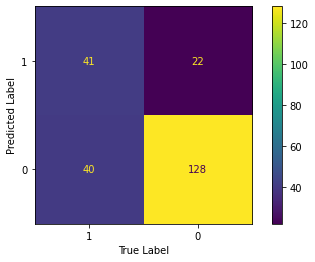

In [30]:
fig_confusion_matrix, ax = plt.subplots(1,1,figsize=(7,4))
ConfusionMatrixDisplay(confusion_matrix(predict,y_test,labels=[1,0]),
                       display_labels=[1,0]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

In [31]:
# Uploading figures
logger.info("Uploading figures")
run.log(
    {
        "confusion_matrix": wandb.Image(fig_confusion_matrix),
        # "other_figure": wandb.Image(other_fig)
    }
)

23-05-2022 12:25:51 Uploading figures


In [32]:
run.finish()

Acc,0.7316
F1,0.56944
Precision,0.65079
Recall,0.50617
